In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import os
import shutil

2023-12-04 00:19:54.707491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-04 00:19:54.707509: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df = pd.read_csv('train/train.csv')

damage_dict = {
    1: 'crack',
    2: 'scratch',
    3: 'tire flat',
    4: 'dent',
    5: 'glass shatter',
    6: 'lamp broken'
}

df['type'] = df['label'].map(damage_dict.get)
df.head()

,image_id,filename,label,type
0,1,1.jpg,2,scratch
1,2,2.jpg,4,dent
2,3,3.jpg,2,scratch
3,4,4.jpg,3,tire flat
4,5,5.jpg,5,glass shatter


<AxesSubplot: ylabel='type'>

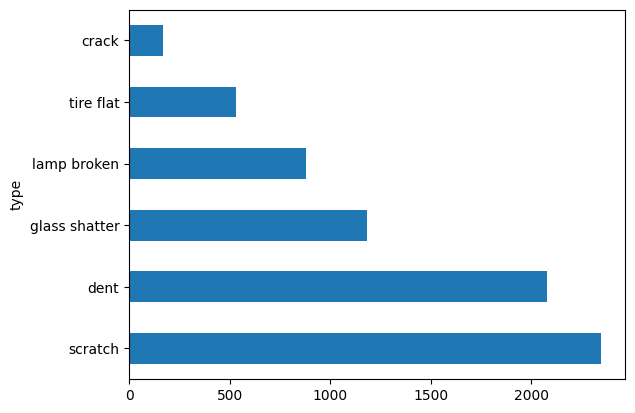

In [5]:
df['type'].value_counts().plot(kind='barh')

In [6]:
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')

type
scratch          1645
dent             1455
glass shatter     829
lamp broken       618
tire flat         374
crack             119
Name: count, dtype: int64 

type
scratch          352
dent             312
glass shatter    178
lamp broken      132
tire flat         80
crack             26
Name: count, dtype: int64 

type
scratch          352
dent             312
glass shatter    178
lamp broken      132
tire flat         80
crack             26
Name: count, dtype: int64 



In [7]:
base_dir = ''

train_dir = os.path.join(base_dir, 'train1')
val_dir = os.path.join(base_dir, 'val1')
test_dir = os.path.join(base_dir, 'test1')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [8]:
src_dir = 'train/images'


for index, row in train.iterrows():

    diagnosis = row['type']
    
    id_code = str(row['image_id']) + ".jpg"
    train_dir = '/home/suraj/intern_work/Insurance_claim_detection/train1'

    srcfile = os.path.join(src_dir,id_code)
    dstfile = os.path.join(train_dir,diagnosis)

    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)



for index, row in val.iterrows():

    diagnosis = row['type']
    
    id_code = str(row['image_id']) + ".jpg"
    val_dir = '/home/suraj/intern_work/Insurance_claim_detection/val1'

    srcfile = os.path.join(src_dir, id_code)
    dstfile = os.path.join(val_dir, diagnosis)

    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():

    diagnosis = row['type']

    id_code = str(row['image_id']) + ".jpg"
    test_dir = '/home/suraj/intern_work/Insurance_claim_detection/test1'

    srcfile = os.path.join(src_dir, id_code)
    dstfile = os.path.join(test_dir, diagnosis)

    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [6]:
train_path = 'train1'
val_path = 'val1'
test_path = 'test1'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224))
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224))
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224))


Found 5040 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


In [9]:
test = 'test'
test_batchesk = ImageDataGenerator(rescale = 1./255).flow_from_directory(directory=test,target_size=(224,224))

Found 4800 images belonging to 1 classes.


In [11]:
model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (3,3), padding="valid", activation = 'sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.27),
    layers.Dense(6, activation = 'softmax')
])



model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

history = model.fit(train_batches,
                    epochs=150,
                    validation_data=val_batches)

In [13]:
model.save('prime_model.h5')

In [4]:
savedModel=load_model('prime_model.h5')

2023-12-04 00:20:03.915560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 00:20:03.915767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-04 00:20:03.915848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-12-04 00:20:03.915926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-12-04 00:20:03.915995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [7]:
loss, acc = savedModel.evaluate_generator(test_batches, verbose=1)
# print("Loss: ", loss)
print("Accuracy: ", acc)

/tmp/ipykernel_4709/2284690981.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = savedModel.evaluate_generator(test_batches, verbose=1)


34/34 [==============================] - 5s 152ms/step - loss: 0.2877 - acc: 0.6213
Accuracy:  0.6212962865829468


In [10]:
arrayk = savedModel.predict(test_batchesk, verbose=1)
len(arrayk)

150/150 [==============================] - 22s 149ms/step


4800

In [12]:
numbers = np.array(arrayk)

l = []
for i in range(len(arrayk)):
    l.append(np.argmax(arrayk[i]))  


In [14]:
dt = np.array(l)

sb = pd.DataFrame({'image_id': test_batchesk.filenames, 'label': dt})

damage_dict = {
    0: 'crack',
    1: 'scratch',
    2: 'tire flat',
    3: 'dent',
    4: 'glass shatter',
    5: 'lamp broken'
}

sb['type'] = sb['label'].map(damage_dict.get)
sb.head()

sb.to_csv('submission.csv', index=False)